In [107]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [108]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark

In [109]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

In [110]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [111]:
spark

In [112]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [113]:
df = spark.read.csv('/content/gdrive/MyDrive/datasets/covid19/Casos_positivos_de_COVID-19_en_Colombia.csv', inferSchema=True, header=True)

In [114]:
df.columns

['fecha reporte web',
 'ID de caso',
 'Fecha de notificación',
 'Código DIVIPOLA departamento',
 'Nombre departamento',
 'Código DIVIPOLA municipio',
 'Nombre municipio',
 'Edad',
 'Unidad de medida de edad',
 'Sexo',
 'Tipo de contagio',
 'Ubicación del caso',
 'Estado',
 'Código ISO del país',
 'Nombre del país',
 'Recuperado',
 'Fecha de inicio de síntomas',
 'Fecha de muerte',
 'Fecha de diagnóstico',
 'Fecha de recuperación',
 'Tipo de recuperación',
 'Pertenencia étnica',
 'Nombre del grupo étnico']

In [115]:
df.printSchema()

root
 |-- fecha reporte web: timestamp (nullable = true)
 |-- ID de caso: integer (nullable = true)
 |-- Fecha de notificación: timestamp (nullable = true)
 |-- Código DIVIPOLA departamento: integer (nullable = true)
 |-- Nombre departamento: string (nullable = true)
 |-- Código DIVIPOLA municipio: integer (nullable = true)
 |-- Nombre municipio: string (nullable = true)
 |-- Edad: integer (nullable = true)
 |-- Unidad de medida de edad: integer (nullable = true)
 |-- Sexo: string (nullable = true)
 |-- Tipo de contagio: string (nullable = true)
 |-- Ubicación del caso: string (nullable = true)
 |-- Estado: string (nullable = true)
 |-- Código ISO del país: integer (nullable = true)
 |-- Nombre del país: string (nullable = true)
 |-- Recuperado: string (nullable = true)
 |-- Fecha de inicio de síntomas: timestamp (nullable = true)
 |-- Fecha de muerte: timestamp (nullable = true)
 |-- Fecha de diagnóstico: timestamp (nullable = true)
 |-- Fecha de recuperación: timestamp (nullable = tr

In [116]:
df.select('fecha reporte web', 'ID de caso').show()

+-------------------+----------+
|  fecha reporte web|ID de caso|
+-------------------+----------+
|2020-12-24 00:00:00|   1556979|
|2020-12-24 00:00:00|   1556980|
|2020-12-24 00:00:00|   1556981|
|2020-12-24 00:00:00|   1556982|
|2020-12-24 00:00:00|   1556983|
|2020-12-24 00:00:00|   1556984|
|2020-12-24 00:00:00|   1556985|
|2020-12-24 00:00:00|   1556986|
|2020-12-24 00:00:00|   1556987|
|2020-12-24 00:00:00|   1556988|
|2020-12-24 00:00:00|   1556989|
|2020-12-24 00:00:00|   1556990|
|2020-12-24 00:00:00|   1556991|
|2020-12-24 00:00:00|   1556992|
|2020-11-08 00:00:00|   1137429|
|2020-11-08 00:00:00|   1137430|
|2020-11-08 00:00:00|   1137431|
|2020-11-08 00:00:00|   1137432|
|2020-11-08 00:00:00|   1137433|
|2020-11-08 00:00:00|   1137434|
+-------------------+----------+
only showing top 20 rows



# Segunto punto

In [117]:
df.select('*').show()

+-------------------+----------+---------------------+----------------------------+-------------------+-------------------------+----------------+----+------------------------+----+----------------+------------------+---------+-------------------+---------------+----------+---------------------------+-------------------+--------------------+---------------------+--------------------+------------------+-----------------------+
|  fecha reporte web|ID de caso|Fecha de notificación|Código DIVIPOLA departamento|Nombre departamento|Código DIVIPOLA municipio|Nombre municipio|Edad|Unidad de medida de edad|Sexo|Tipo de contagio|Ubicación del caso|   Estado|Código ISO del país|Nombre del país|Recuperado|Fecha de inicio de síntomas|    Fecha de muerte|Fecha de diagnóstico|Fecha de recuperación|Tipo de recuperación|Pertenencia étnica|Nombre del grupo étnico|
+-------------------+----------+---------------------+----------------------------+-------------------+-------------------------+-----------

In [118]:
for col in (df.columns):
    new_col = col.lower().replace(" ", "_")
    df = df.withColumnRenamed(col, new_col)
df.columns

['fecha_reporte_web',
 'id_de_caso',
 'fecha_de_notificación',
 'código_divipola_departamento',
 'nombre_departamento',
 'código_divipola_municipio',
 'nombre_municipio',
 'edad',
 'unidad_de_medida_de_edad',
 'sexo',
 'tipo_de_contagio',
 'ubicación_del_caso',
 'estado',
 'código_iso_del_país',
 'nombre_del_país',
 'recuperado',
 'fecha_de_inicio_de_síntomas',
 'fecha_de_muerte',
 'fecha_de_diagnóstico',
 'fecha_de_recuperación',
 'tipo_de_recuperación',
 'pertenencia_étnica',
 'nombre_del_grupo_étnico']

In [119]:
from pyspark.sql.functions import datediff

df = df.withColumn("tiempo_de_recuperacion_dias",
                   datediff("fecha_de_recuperación", "fecha_de_inicio_de_síntomas"))
df.show()

+-------------------+----------+---------------------+----------------------------+-------------------+-------------------------+----------------+----+------------------------+----+----------------+------------------+---------+-------------------+---------------+----------+---------------------------+-------------------+--------------------+---------------------+--------------------+------------------+-----------------------+---------------------------+
|  fecha_reporte_web|id_de_caso|fecha_de_notificación|código_divipola_departamento|nombre_departamento|código_divipola_municipio|nombre_municipio|edad|unidad_de_medida_de_edad|sexo|tipo_de_contagio|ubicación_del_caso|   estado|código_iso_del_país|nombre_del_país|recuperado|fecha_de_inicio_de_síntomas|    fecha_de_muerte|fecha_de_diagnóstico|fecha_de_recuperación|tipo_de_recuperación|pertenencia_étnica|nombre_del_grupo_étnico|tiempo_de_recuperacion_dias|
+-------------------+----------+---------------------+----------------------------+-

In [120]:
df = df.drop("tiempo_de_recuperacion_dias")
df.show()

+-------------------+----------+---------------------+----------------------------+-------------------+-------------------------+----------------+----+------------------------+----+----------------+------------------+---------+-------------------+---------------+----------+---------------------------+-------------------+--------------------+---------------------+--------------------+------------------+-----------------------+
|  fecha_reporte_web|id_de_caso|fecha_de_notificación|código_divipola_departamento|nombre_departamento|código_divipola_municipio|nombre_municipio|edad|unidad_de_medida_de_edad|sexo|tipo_de_contagio|ubicación_del_caso|   estado|código_iso_del_país|nombre_del_país|recuperado|fecha_de_inicio_de_síntomas|    fecha_de_muerte|fecha_de_diagnóstico|fecha_de_recuperación|tipo_de_recuperación|pertenencia_étnica|nombre_del_grupo_étnico|
+-------------------+----------+---------------------+----------------------------+-------------------+-------------------------+-----------

In [121]:
df.filter(df['edad']>='60').select('id_de_caso', 'edad').show()

+----------+----+
|id_de_caso|edad|
+----------+----+
|   1556979|  67|
|   1556980|  66|
|   1556981|  68|
|   1556982|  74|
|   1556983|  65|
|   1556984|  66|
|   1556985|  74|
|   1556986|  66|
|   1556987|  64|
|   1556988|  65|
|   1556989|  62|
|   1137430|  77|
|   1137434|  81|
|   1137440|  85|
|   1137441|  78|
|   1137442|  81|
|   1137443|  78|
|   1137444|  64|
|   1137446|  63|
|   1137447|  87|
+----------+----+
only showing top 20 rows



In [122]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Definir una función UDF
def categorizar_edad(age):
    if age < 18:
        return "menor"
    elif age <= 60:
        return "adulto"
    else:
        return "mayor"

mi_udf = udf(categorizar_edad, StringType())
df.withColumn("categoria_edad", mi_udf(df.edad)).show()

+-------------------+----------+---------------------+----------------------------+-------------------+-------------------------+----------------+----+------------------------+----+----------------+------------------+---------+-------------------+---------------+----------+---------------------------+-------------------+--------------------+---------------------+--------------------+------------------+-----------------------+--------------+
|  fecha_reporte_web|id_de_caso|fecha_de_notificación|código_divipola_departamento|nombre_departamento|código_divipola_municipio|nombre_municipio|edad|unidad_de_medida_de_edad|sexo|tipo_de_contagio|ubicación_del_caso|   estado|código_iso_del_país|nombre_del_país|recuperado|fecha_de_inicio_de_síntomas|    fecha_de_muerte|fecha_de_diagnóstico|fecha_de_recuperación|tipo_de_recuperación|pertenencia_étnica|nombre_del_grupo_étnico|categoria_edad|
+-------------------+----------+---------------------+----------------------------+-------------------+-------

# Tercer punto

In [132]:
top_10_departamentos = df.groupBy('nombre_departamento').count().orderBy('count',ascending=False).limit(10)
top_10_departamentos.toPandas().to_csv('/content/top_10_departamentos.csv')
top_10_departamentos.show()

+-------------------+-------+
|nombre_departamento|  count|
+-------------------+-------+
|             BOGOTA|1888137|
|          ANTIOQUIA| 955271|
|              VALLE| 572724|
|       CUNDINAMARCA| 331331|
|          SANTANDER| 297370|
|       BARRANQUILLA| 277989|
|          CARTAGENA| 163526|
|          ATLANTICO| 141072|
|             BOYACA| 131133|
|             TOLIMA| 127764|
+-------------------+-------+



In [133]:
top_10_municipios =df.groupBy('nombre_municipio').count().orderBy('count',ascending=False).limit(10)
top_10_municipios.toPandas().to_csv('/content/top_10_municipios.csv')
top_10_municipios.show()

+----------------+-------+
|nombre_municipio|  count|
+----------------+-------+
|          BOGOTA|1888137|
|        MEDELLIN| 550790|
|            CALI| 406751|
|    BARRANQUILLA| 277989|
|       CARTAGENA| 163526|
|     BUCARAMANGA| 142842|
|          IBAGUE|  91598|
|     SANTA MARTA|  84863|
|       MANIZALES|  84478|
|          CUCUTA|  77359|
+----------------+-------+



In [134]:
top_fechas = df.groupBy("fecha_de_diagnóstico").count().orderBy("count", ascending=False).limit(10)
top_fechas.toPandas().to_csv('/content/top_fechas.csv')
top_fechas.show()

+--------------------+-----+
|fecha_de_diagnóstico|count|
+--------------------+-----+
| 2022-01-07 00:00:00|42180|
| 2022-01-06 00:00:00|40352|
| 2022-01-12 00:00:00|35609|
| 2022-01-05 00:00:00|35551|
| 2022-01-11 00:00:00|35495|
| 2022-01-13 00:00:00|34791|
| 2021-06-25 00:00:00|34173|
| 2021-06-23 00:00:00|33936|
| 2021-06-15 00:00:00|33826|
| 2021-06-24 00:00:00|33220|
+--------------------+-----+



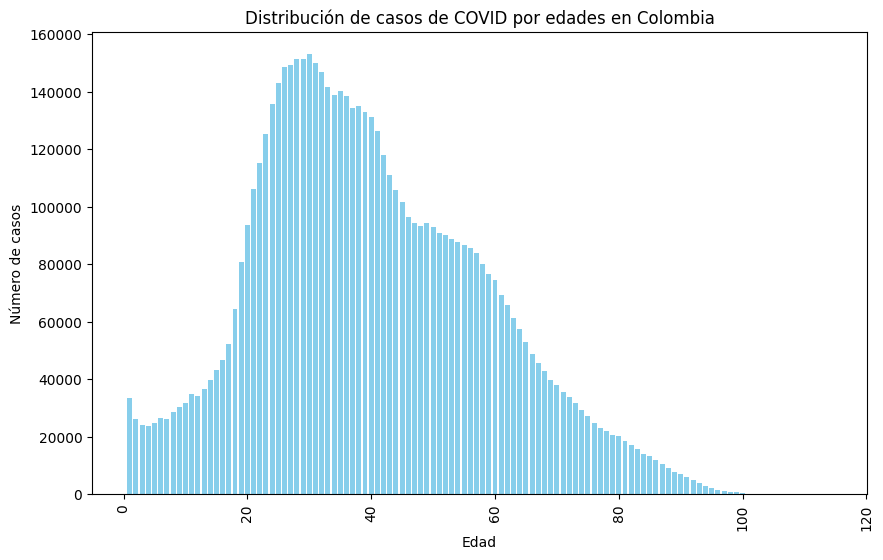

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

age_distribution = df.groupBy("edad").count().orderBy("edad")
age_distribution_pd = age_distribution.toPandas()
age_distribution_pd.to_csv('/content/age_distribution.csv')

# Crear un gráfico de barras para visualizar la distribución de casos por edades
plt.figure(figsize=(10, 6))
plt.bar(age_distribution_pd['edad'], age_distribution_pd['count'], color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Número de casos')
plt.title('Distribución de casos de COVID por edades en Colombia')
plt.xticks(rotation=90)
plt.show()

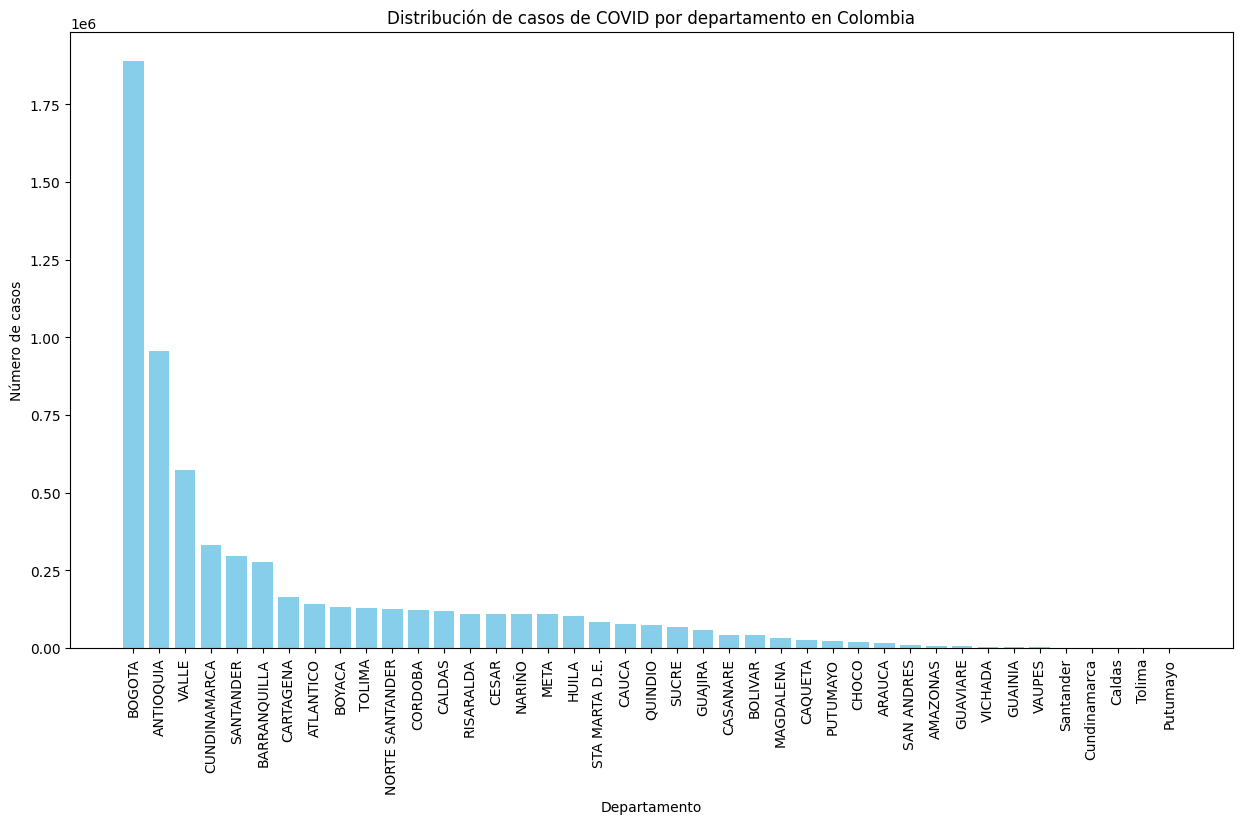

In [136]:
department_distribution = df.groupBy("nombre_departamento").count().orderBy("count", ascending=False)

# Convertir el DataFrame de PySpark a un DataFrame de Pandas para visualización
department_distribution_pd = department_distribution.toPandas()
department_distribution_pd.to_csv('/content/department_distribution.csv')

# Crear un gráfico de barras para visualizar la distribución de casos por departamento
plt.figure(figsize=(15, 8))
plt.bar(department_distribution_pd['nombre_departamento'], department_distribution_pd['count'], color='skyblue')
plt.xlabel('Departamento')
plt.ylabel('Número de casos')
plt.title('Distribución de casos de COVID por departamento en Colombia')
plt.xticks(rotation=90)
plt.show()

In [138]:
!ls /content/*.csv

/content/age_distribution.csv	      /content/top_10_departamentos.csv  /content/top_fechas.csv
/content/department_distribution.csv  /content/top_10_municipios.csv


In [144]:
!pwd
!pip install boto3

/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 10.6 MB/s eta 0:00:00


In [152]:
# Guardar el DF en S3
import boto3

# AWS config
key = ""
secret = ""
token = ""

# Local path
file_path = '/content/'

# S3 path
bucket_name = 'adrephos-bucket'
bucket_path = 'proyecto-3/'

s3 = boto3.resource('s3', aws_access_key_id=key, aws_secret_access_key=secret, aws_session_token=token)

In [153]:
files = ["/content/age_distribution.csv", "/content/top_10_departamentos.csv", "/content/top_fechas.csv",
         "/content/department_distribution.csv", "/content/top_10_municipios.csv"]

for file in files:
  s3.Bucket(bucket_name).upload_file(file, bucket_path + file.split('/')[2])